# Fintech Dataset Description

1. <span style="color:#B22222">**Customer Id**</span>: Unique identifier assigned to each customer for reference in the dataset.
2. <span style="color:#B22222">**Emp Title**</span>: Job title or occupation of the customer (borrower).
3. <span style="color:#B22222">**Emp Length**</span>: Length of employment for the customer, often recorded in years.
4. <span style="color:#B22222">**Home Ownership**</span>: The ownership status of the customer’s home, such as "Rent," "Own," or "Mortgage."
5. <span style="color:#B22222">**Annual Inc**</span>: The customer’s individual annual income.
6. <span style="color:#B22222">**Annual Inc Joint**</span>: The combined annual income of the customer and co-borrower (if applicable), typically in cases where there is joint borrowing.
7. <span style="color:#B22222">**Verification Status**</span>: The verification status of the customer’s income and employment, typically values like "Verified," "Not Verified," or "Source Verified."
8. <span style="color:#B22222">**Zip Code**</span>: The postal code prefix corresponding to the customer’s residential address.
9. <span style="color:#B22222">**Addr State**</span>: The state in which the customer resides, represented by a two-letter state abbreviation.
10. <span style="color:#B22222">**Avg Cur Bal**</span>: The customer’s average current balance across all active accounts, possibly including credit cards, loans, etc.
11. <span style="color:#B22222">**Tot Cur Bal**</span>: The total current balance of all the customer’s accounts, which may include outstanding loans, credit cards, and other financial obligations.
12. <span style="color:#B22222">**Loan Id**</span>: A unique identifier for each loan issued to a customer.
13. <span style="color:#B22222">**Loan Status**</span>: The current status of the loan, such as "Current," "Fully Paid," "Late," "Charged Off," etc.
14. <span style="color:#B22222">**Loan Amount**</span>: The original amount of money borrowed by the customer.
15. <span style="color:#B22222">**State**</span>: The state where the loan was issued or where the borrower resides.
16. <span style="color:#B22222">**Funded Amount**</span>: The actual amount of the loan funded (which may differ from the original loan request or loan amount).
17. <span style="color:#B22222">**Term**</span>: The length of time over which the loan is to be repaid, typically in months (e.g., 36 or 60 months).
18. <span style="color:#B22222">**Int Rate**</span>: The annual interest rate on the loan.
19. <span style="color:#B22222">**Grade**</span>: A grade assigned to the loan, which may reflect the borrower’s creditworthiness or risk level.
    - <span style="color:white">A (1-5)</span>
    - <span style="color:white">B (6-10)</span>
    - <span style="color:white">C (11-15)</span>
    - <span style="color:white">D (16-20)</span>
    - <span style="color:white">E (21-25)</span>
    - <span style="color:white">F (26-30)</span>
    - <span style="color:white">G (31-35)</span>
20. <span style="color:#B22222">**Issue Date**</span>: The date when the loan was issued to the borrower.
21. <span style="color:#B22222">**Pymnt Plan**</span>: Indicates whether the borrower is enrolled in a payment plan or not.
22. <span style="color:#B22222">**Type**</span>: The type of loan, such as "Individual," or "Joint," which means that two or more customers requested the loan together, or "Direct Pay."
23. <span style="color:#B22222">**Purpose**</span>: The reason the borrower applied for the loan, such as "Debt Consolidation," "Home Improvement," "Medical," etc.
24. <span style="color:#B22222">**Description**</span>: Additional information or a brief description provided by the customer regarding the purpose of the loan or their financial situation.


# Importing and Loading the Data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler


In [94]:
df=pd.read_csv("E:/GUC/Sem 9/(NETW908) Data Engineering/fintech_data_29_52_23411.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# initializing the lookup_table 
lookup_table = pd.DataFrame()

In [95]:
def log_to_lookup_table(tmp,df,key,note):
    global lookup_table

    if key == "I":
        # Find differences
        changes_mask = (tmp != df)
        # Create a DataFrame to log changes
        changes = []
        # Iterate through the DataFrame to log changes
        for col in changes_mask.columns:
            for index in changes_mask.index:
                if changes_mask.at[index, col]:  # If there's a change
                    c=df.at[index, col]
                    if df[col].dtype != 'object':
                        c=str(c)+" ("+note+")"
                    changes.append({
                    'Column': col,
                    'Original': tmp.at[index, col],
                    'Imputed/Encoded': c
                })
        
    elif key == "E":
        # Find differences
        changes_mask = (tmp != df)
        # Create a DataFrame to log changes
        changes = []
        # Iterate through the DataFrame to log changes
        for col in changes_mask.columns:
            for index in changes_mask.index:
                if changes_mask.at[index, col]:  # If there's a change
                    c=df.at[index, col]
                    changes.append({
                    'Column': col,
                    'Original': tmp.at[index, col],
                    'Imputed/Encoded': c
                })
    else:
        print("Wrong Key. Choose either I for Imputation or E for Encoding")
    changes_df = pd.DataFrame(changes).drop_duplicates()
    changes_df.set_index('Column', inplace=True)
    lookup_table = pd.concat([lookup_table, changes_df], axis=0).drop_duplicates()
    print("Updated Lookup_table : ")
    display(lookup_table)
    return
  

In [96]:
df.head()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,YidceGZlWFx4ZTBSXHhmZnxceGRjXHg4OVx4MTRceGI4PF...,Director of pharmacy,10+ years,MORTGAGE,165000.0,NaN,Source Verified,293xx,SC,2464.0,39425.0,188460,Current,20000.0,SC,20000.0,36 months,0.0646,1,18 December 2018,False,Individual,debt_consolidation,Debt consolidation
1,YidceDgyXHhlNlx4MTdATitceGUxdFx4YjI+XHgwMVx4ZT...,Manager,10+ years,RENT,51000.0,NaN,Source Verified,300xx,GA,12685.0,88792.0,126546,Current,12000.0,GA,12000.0,60 months,0.1465,11,15 September 2015,False,Individual,debt_consolidation,Debt consolidation
2,YidceDBjeVx4ZDBlXHhhZVx4OWZceGNjUTFceGJkYFx4MW...,Senior software developer,3 years,RENT,100000.0,NaN,Not Verified,847xx,UT,5010.0,35069.0,98506,Current,10000.0,UT,10000.0,36 months,0.1894,18,18 November 2018,False,Individual,debt_consolidation,Debt consolidation
3,YiJbUVx4YzZceGVhXHg4MFx4ODZceGRjXHgwZVx4OWFceG...,NaN,< 1 year,MORTGAGE,95000.0,NaN,Source Verified,300xx,GA,8424.0,84243.0,124163,Current,12000.0,GA,12000.0,36 months,0.2534,21,19 January 2019,False,Individual,small_business,Business
4,YidceDg2TmFceDk0XHgxM2FceDAzJjlceGEwQFx4ZjQ8aF...,Business accountant/ executive assistant,10+ years,OWN,55120.0,NaN,Not Verified,058xx,VT,4749.0,47487.0,229644,Current,25000.0,VT,25000.0,60 months,0.2250,18,19 August 2019,False,Individual,debt_consolidation,Debt consolidation


In [97]:
df.shape

(27030, 24)

# EDA

+ Through this Exploratory data analysis we whcih to answer the following questions:
  
    1.  Loan amount distribution
    2.  Job title or occupation that has the highest loans.
    3.  State that has the highest number of issued loans.
    4.  Most common Purpose of issuing a loan.
    6.  Distribution of Numeric columns
    5.  Does being enrolled in a payment plan affect the loan status
    6.  Pie Chart of the loan status
    7.  Pie chart of the loan types
    8.  Pie Chart of the Home Ownership

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24592 non-null  object 
 2   Emp Length           25107 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1914 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

In [100]:
df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1914.000000,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25861.000000,27030.000000
mean,8.017186e+04,132096.659450,13659.708250,1.453933e+05,135529.192897,15432.818165,15432.818165,0.131069,10.949945
std,9.054051e+04,75241.991803,16227.965336,1.616145e+05,77688.469025,9404.566416,9404.566416,0.048901,6.325086
min,2.000000e+02,21780.000000,0.000000,0.000000e+00,15.000000,1000.000000,1000.000000,0.053100,1.000000
25%,4.774625e+04,87000.000000,3119.000000,2.936750e+04,68151.500000,8000.000000,8000.000000,0.094300,6.000000
50%,6.650000e+04,116779.500000,7358.500000,8.065050e+04,136049.000000,13500.000000,13500.000000,0.126200,10.000000
75%,9.500000e+04,157000.000000,18973.750000,2.186382e+05,202565.500000,20168.750000,20168.750000,0.160100,15.000000
max,8.608920e+06,900000.000000,253509.000000,2.448230e+06,270299.000000,40000.000000,40000.000000,0.309900,35.000000


In [101]:
df.describe(include=[object,'bool'])

,Customer Id,Emp Title,Emp Length,Home Ownership,Verification Status,Zip Code,Addr State,Loan Status,State,Term,Issue Date,Pymnt Plan,Type,Purpose,Description
count,27030,24592,25107,27030,27030,27030,27030,27030,27030,27030,27030,27030,27030,27030,26790
unique,27030,13211,11,5,3,853,50,7,50,2,89,2,5,13,816
top,YidceGZlWFx4ZTBSXHhmZnxceGRjXHg4OVx4MTRceGI4PF...,Teacher,10+ years,MORTGAGE,Source Verified,112xx,CA,Current,CA,36 months,16 March 2016,False,Individual,debt_consolidation,Debt consolidation
freq,1,467,8902,13302,10463,295,3638,16937,3638,18953,682,27029,16807,15197,14233


In [102]:
# Select only categorical columns (e.g., object dtype)
categorical_df = df[['Home Ownership','Loan Status','Term','Type','Purpose']].columns

# Get unique values for each categorical column
unique_values = {col: df[col].unique() for col in categorical_df}

# Print unique values
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")
    print()

Unique values in 'Home Ownership': ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'OTHER']

Unique values in 'Loan Status': ['Current' 'Charged Off' 'Fully Paid' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default']

Unique values in 'Term': [' 36 months' ' 60 months']

Unique values in 'Type': ['Individual' 'INDIVIDUAL' 'Joint App' 'JOINT' 'DIRECT_PAY']

Unique values in 'Purpose': ['debt_consolidation' 'small_business' 'credit_card' 'moving'
 'home_improvement' 'car' 'other' 'medical' 'vacation' 'major_purchase'
 'house' 'renewable_energy' 'wedding']



## Simple Cleaning
As we can see the data need some cleaning before any exploration on it .
- we will first remove extra spaces and convert some columns into lower case and upper case


In [104]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Customer Id', 'Emp Title', 'Emp Length', 'Home Ownership',
       'Verification Status', 'Zip Code', 'Addr State', 'Loan Status', 'State',
       'Term', 'Issue Date', 'Type', 'Purpose', 'Description'],
      dtype='object')

In [105]:
# removing spaces
for col in df.columns:
    df['Loan Status'] = df['Loan Status'].str.strip()

#Converting to upper case
df['Addr State'] = df['Addr State'].str.upper()
df['State'] = df['State'].str.upper()

#Converting to lower case
df['Purpose'] = df['Purpose'].str.lower()
df['Type'] = df['Type'].str.lower()


## Exploration

### Loan amount Dist

<Axes: xlabel='Loan Amount', ylabel='Count'>

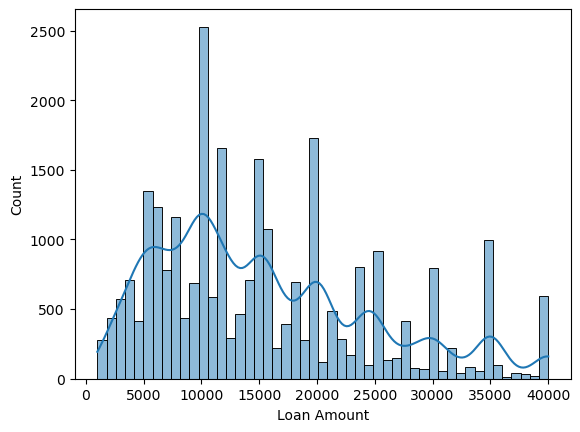

In [108]:
sns.histplot(df['Loan Amount'],kde=True)

- The graph shows that the loan amount has certain values which causes spikes in the distribution.

### Job title or occupation that has the highest loans.

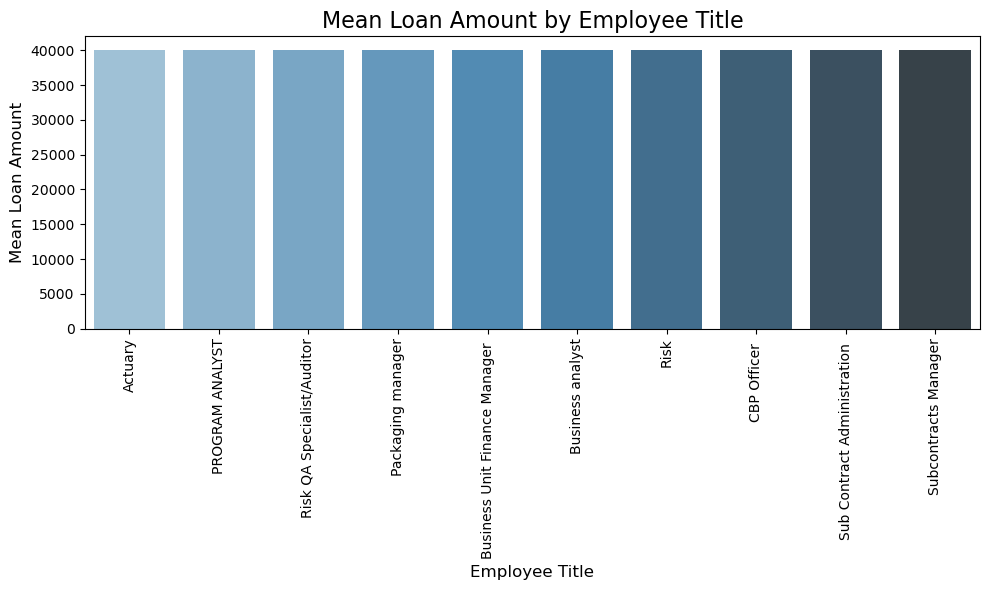

In [111]:
grouped=pd.DataFrame({'mean': df.groupby(['Emp Title'])['Loan Amount'].mean()}).sort_values(by='mean', ascending=False)
groupedtop10=grouped.head(10)
# Create a bar plot with Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=groupedtop10.index, y=groupedtop10['mean'], hue=groupedtop10.index,palette='Blues_d')

# Add titles and labels
plt.title('Mean Loan Amount by Employee Title', fontsize=16)
plt.xlabel('Employee Title', fontsize=12)
plt.ylabel('Mean Loan Amount', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

- The graph did not give us much info due to the high cardinality of Emp Title Column this could cause problem later in the encoding section.

### State that has the highest number of issued loans.

In [114]:
no_states=pd.DataFrame({'Count': df.State.value_counts()})
print(no_states.shape)

(50, 1)


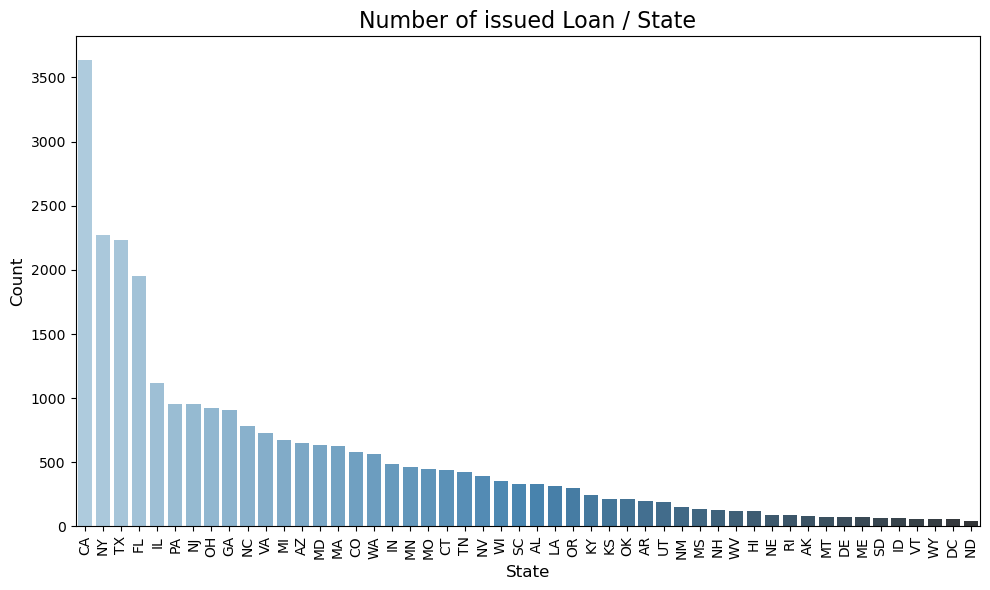

In [115]:
no_states
# Create a bar plot with Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=no_states.index, y=no_states['Count'],hue=no_states.index, palette='Blues_d')

# Add titles and labels
plt.title('Number of issued Loan / State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [116]:
no_states.head(5).sum()/no_states.sum()*100

Count    41.465039
dtype: float64

- Out of the 50 states the states {CA,NY,TX,FL,IL} have the most amount of issued loans with a total of 41.4 % of the total loans of the 50 States 

### Most common Purpose of issuing a loan.

In [119]:
Purpose=pd.DataFrame({'Count': df.Purpose.value_counts()})
Purpose['%']=np.round(Purpose['Count']/Purpose['Count'].sum()*100,2)
Purpose

,Count,%
Purpose,,
debt_consolidation,15197,56.22
credit_card,6419,23.75
home_improvement,1808,6.69
other,1614,5.97
major_purchase,573,2.12
medical,333,1.23
small_business,267,0.99
car,248,0.92
house,201,0.74


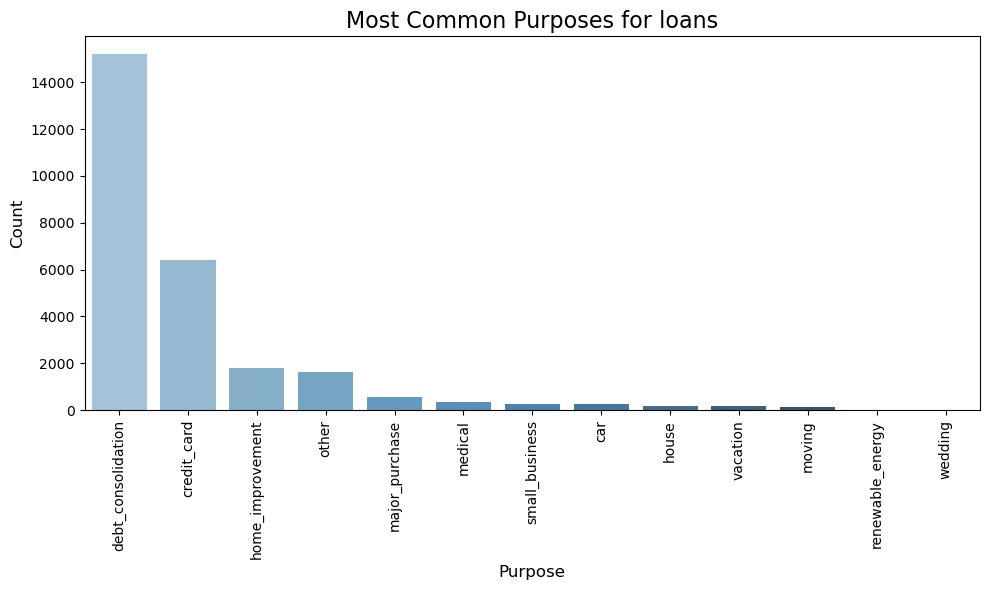

In [120]:
Purpose
# Create a bar plot with Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=Purpose.index, y=Purpose['Count'],hue=Purpose.index, palette='Blues_d')

# Add titles and labels
plt.title('Most Common Purposes for loans', fontsize=16)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

- debt_consolidation is the most common loan purpose with a percentage of 56.2% of the Purposes.

### Distribution of Numeric column

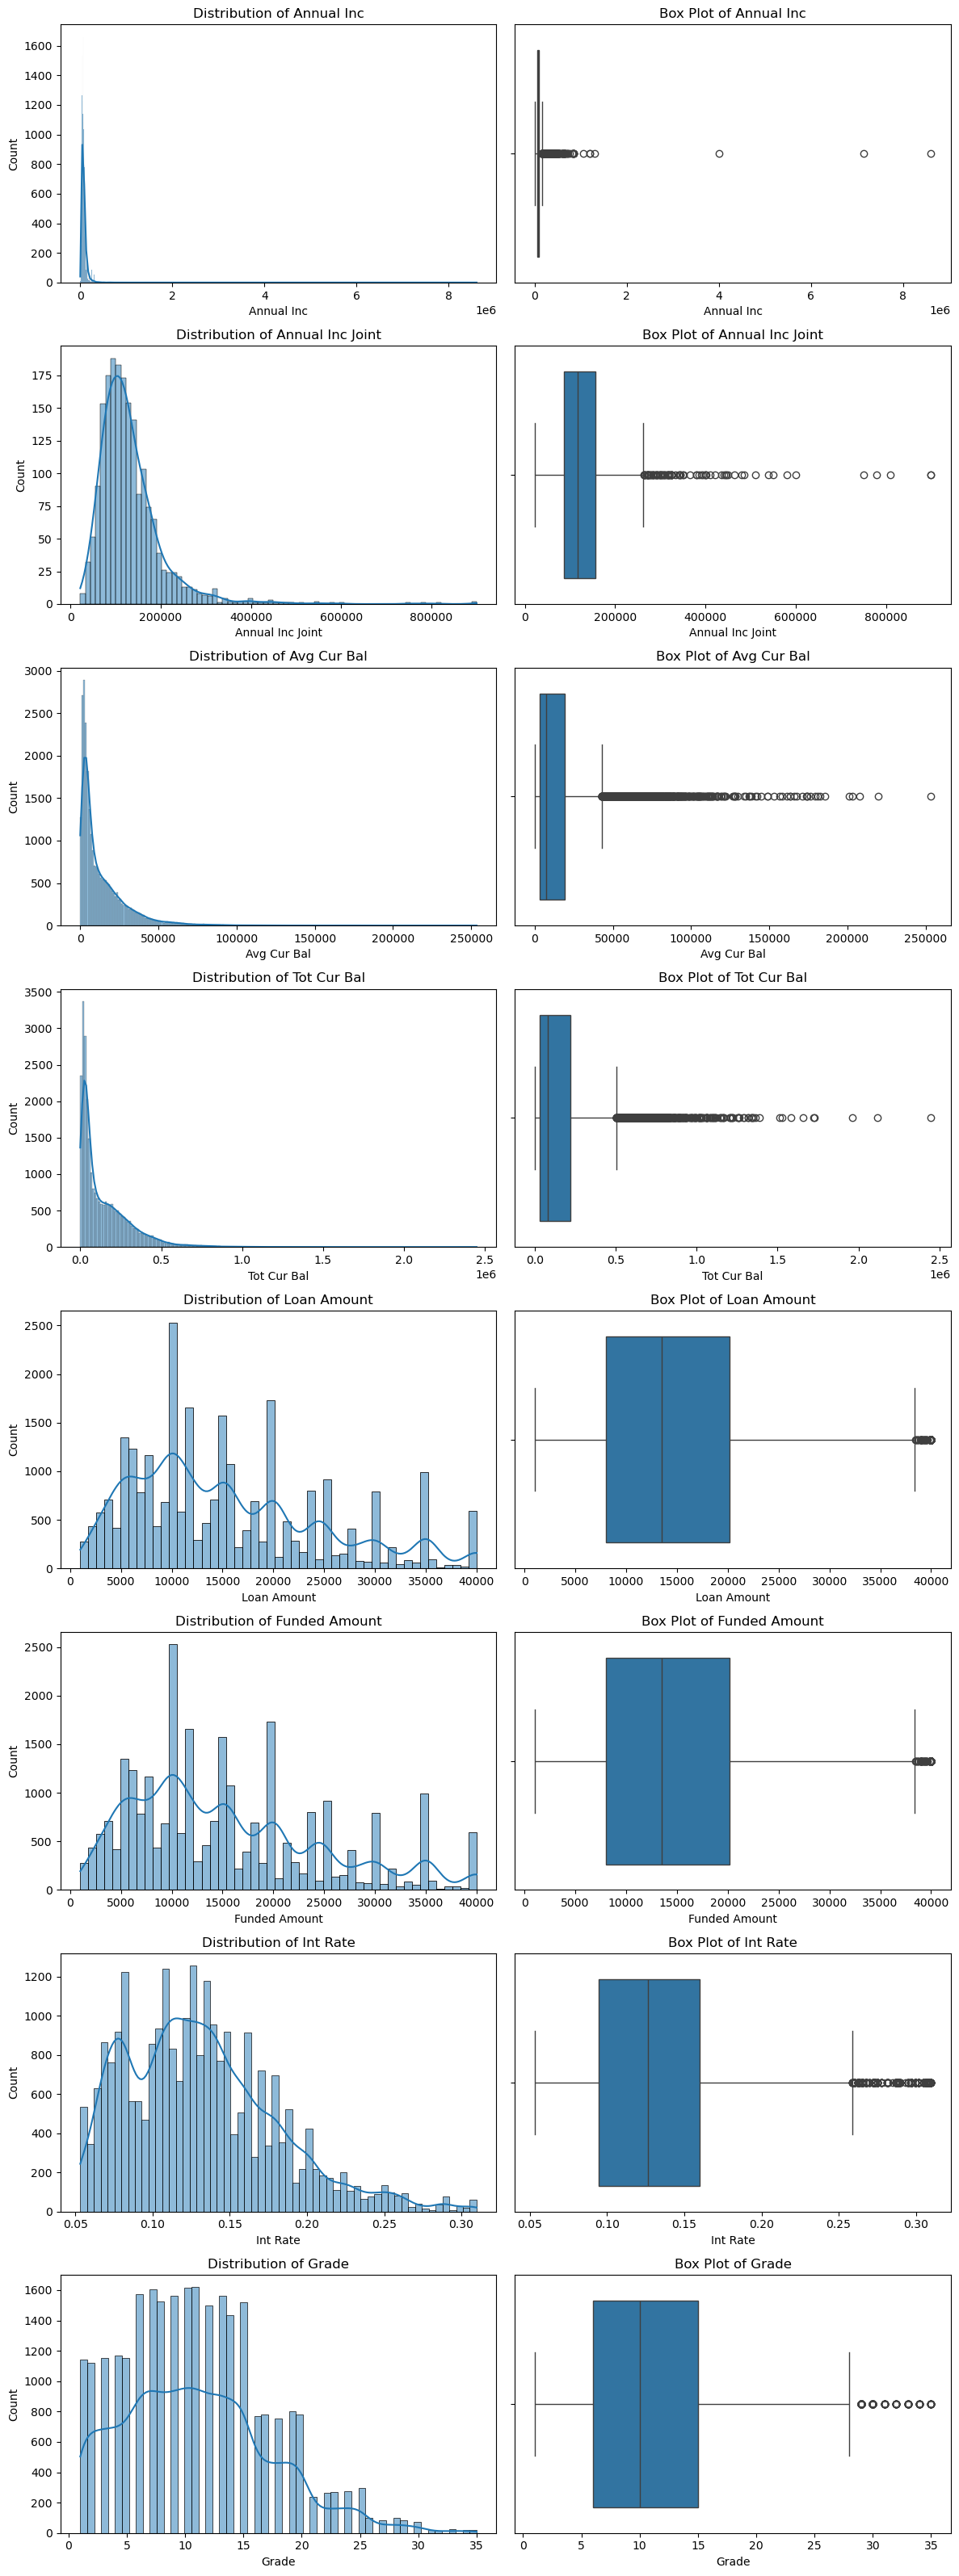

In [123]:
# Set up the figure and subplots
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Loan Id'])
num_columns = len(numeric_df.columns)  # Number of columns in your DataFrame
fig, axes = plt.subplots(num_columns, 2, figsize=(12, num_columns * 4))  # 2 subplots (distribution and boxplot) for each column

# Loop through each column to create distribution and boxplot
for i, column in enumerate(numeric_df.columns):
    # Distribution Plot
    sns.histplot(numeric_df[column], ax=axes[i, 0], kde=True)  # kde=True adds a kernel density estimate (smoothed curve)
    axes[i, 0].set_title(f'Distribution of {column}')

    # Box Plot
    sns.boxplot(x=numeric_df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {column}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

- This Data will be useful in handling outliers later in the Notebook.
- it also shows the distribution of the numeric columns such as Int Rate and other columns related to Income and loan.

  

### Does being enrolled in a payment plan affect the loan status

In [126]:
df.head(2)

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,YidceGZlWFx4ZTBSXHhmZnxceGRjXHg4OVx4MTRceGI4PF...,Director of pharmacy,10+ years,MORTGAGE,165000.0,NaN,Source Verified,293xx,SC,2464.0,39425.0,188460,Current,20000.0,SC,20000.0,36 months,0.0646,1,18 December 2018,False,individual,debt_consolidation,Debt consolidation
1,YidceDgyXHhlNlx4MTdATitceGUxdFx4YjI+XHgwMVx4ZT...,Manager,10+ years,RENT,51000.0,NaN,Source Verified,300xx,GA,12685.0,88792.0,126546,Current,12000.0,GA,12000.0,60 months,0.1465,11,15 September 2015,False,individual,debt_consolidation,Debt consolidation


In [127]:
filtered_df= df[df["Pymnt Plan"]==True]

grouped=filtered_df.groupby(['Loan Status'])
#print(pd.DataFrame(grouped))
df["Pymnt Plan"].value_counts()

Pymnt Plan
False    27029
True         1
Name: count, dtype: int64

- pymnt Plan does not add much to the data since only one entry has true value so it does not affect the loan status.
- It also could be dropped later since in this case its irrelevant

### Pie Chart of the Loan Status

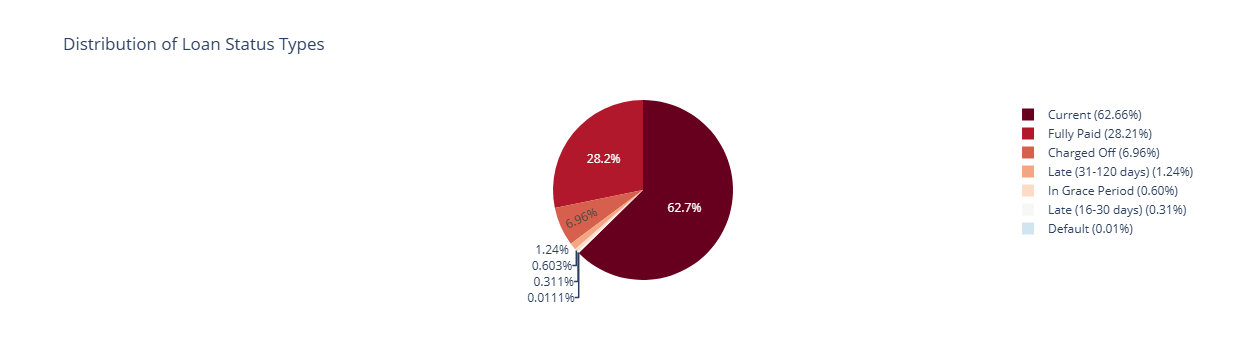

In [130]:
# Assuming 'Loan Status' is a column in your DataFrame
type_counts = df['Loan Status'].value_counts()
percentages = type_counts / type_counts.sum() * 100
# Create a pie chart using Plotly
labels = [f'{label} ({percent:.2f}%)' for label, percent in zip(type_counts.index, percentages)]
fig = px.pie(values=type_counts.values, names=labels, 
             title='Distribution of Loan Status Types', 
             color_discrete_sequence=px.colors.sequential.RdBu, 
             hole=0) 

# Show the plot
fig.show()

- The plot shows us the dominant Loan status with their percentages of the total data.
- the distribution suggests that most borrowers are in good standing, with only a small fraction facing repayment challenges or default.

### Pie chart of the Loan Types

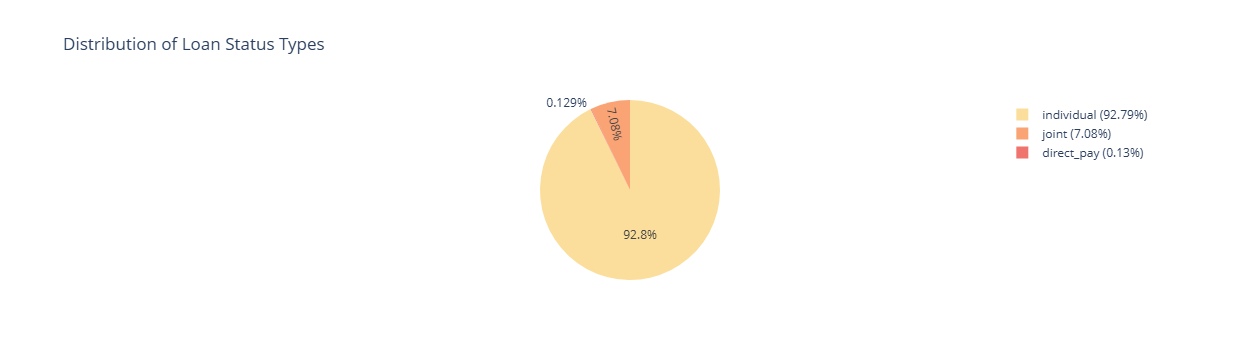

In [133]:
# Assuming 'Loan Status' is a column in your DataFrame
type_counts = df['Type'].replace('joint app','joint').value_counts()
percentages = type_counts / type_counts.sum() * 100
# Create a pie chart using Plotly
labels = [f'{label} ({percent:.2f}%)' for label, percent in zip(type_counts.index, percentages)]
fig = px.pie(values=type_counts.values, names=labels, 
             title='Distribution of Loan Status Types', 
             color_discrete_sequence=px.colors.sequential.Sunsetdark, 
             hole=0) 

# Show the plot
fig.show()

- The distribution highlights that individual loans dominate, with joint and direct pay being much less common.

### Pie Chart of Home Ownership

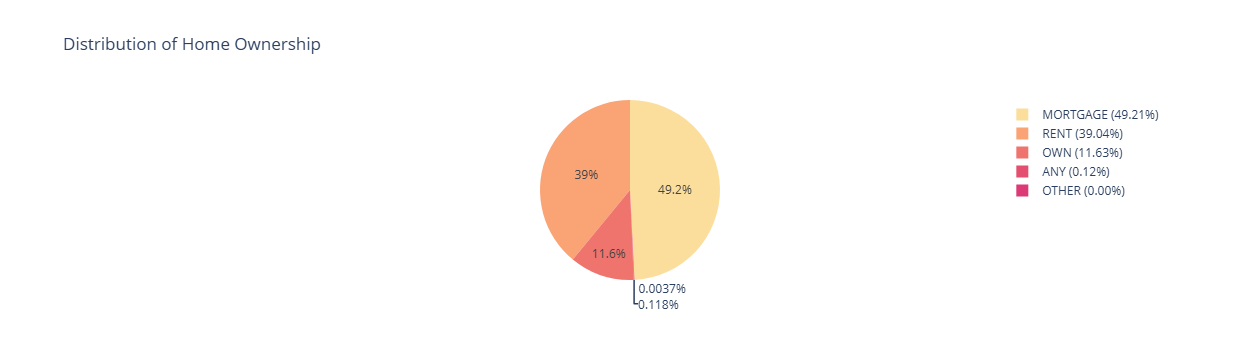

Home Ownership
MORTGAGE    13302
RENT        10552
OWN          3143
ANY            32
OTHER           1
Name: count, dtype: int64

In [136]:
type_counts = df['Home Ownership'].value_counts()
percentages = type_counts / type_counts.sum() * 100
# Create a pie chart using Plotly
labels = [f'{label} ({percent:.2f}%)' for label, percent in zip(type_counts.index, percentages)]
fig = px.pie(values=type_counts.values, names=labels, 
             title='Distribution of Home Ownership', 
             color_discrete_sequence=px.colors.sequential.Sunsetdark, 
             hole=0) 

# Show the plot
fig.show()
type_counts

- There is multiple categories which were not mentioned in the possible Home Ownership labels so we will group them together later.

# Data Cleaning
- Removing Spaces is already done in the Simple Cleaning section

## Choose a suitable column index

- There are multiple columns that qualify to be column indexes (Loan Id and Customer Id).
- We will go with Loan Id since it is more compact.

In [141]:
df.set_index('Loan Id', inplace=True)
df.head(2)

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
Loan Id,,,,,,,,,,,,,,,,,,,,,,,
188460,YidceGZlWFx4ZTBSXHhmZnxceGRjXHg4OVx4MTRceGI4PF...,Director of pharmacy,10+ years,MORTGAGE,165000.0,NaN,Source Verified,293xx,SC,2464.0,39425.0,Current,20000.0,SC,20000.0,36 months,0.0646,1,18 December 2018,False,individual,debt_consolidation,Debt consolidation
126546,YidceDgyXHhlNlx4MTdATitceGUxdFx4YjI+XHgwMVx4ZT...,Manager,10+ years,RENT,51000.0,NaN,Source Verified,300xx,GA,12685.0,88792.0,Current,12000.0,GA,12000.0,60 months,0.1465,11,15 September 2015,False,individual,debt_consolidation,Debt consolidation


## Inconsistent data
-  (i.e. duplicates, irrelevant or incorrect data,
different spelling with the same meaning eg. INDIVIDUAL & Individual, etc)

In [143]:
df_nodesc=df.drop(columns=['Description'])
duplicate_rows = df_nodesc[df_nodesc.duplicated()]
duplicate_rows

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose
Loan Id,,,,,,,,,,,,,,,,,,,,,,


No Duplicates

In [145]:
# Replacing joint app with joint since they are the same.
df['Type']=df['Type'].replace('joint app','joint')
df['Home Ownership']=df['Home Ownership'].replace('ANY','OTHER')
print(df['Type'].unique())
df['Home Ownership'].unique()

['individual' 'joint' 'direct_pay']


array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

## Irrelevent

In [147]:
are_identical=df['Loan Amount'].equals(df['Funded Amount'])
print(f"Are Loan Amount and Funded Amount identical? {are_identical}")
are_identical=df['Addr State'].equals(df['State'])
print(f"Are Addr State and State identical? {are_identical}")

Are Loan Amount and Funded Amount identical? True
Are Addr State and State identical? True


In [148]:
df=df.drop(columns=['Customer Id','Description','Funded Amount','Addr State','Zip Code'])

- 'Funded Amount','Addr State' were removed since they are identical to other columns.
- Zip code column only represents the state the customer is in so it's irrelevant since the state column already does this.
- 'Customer Id' was removed since it does not give me useful info.
- 'Description' was removed since it is inconsistent, and the purpose column is already sufficient.

## Missing data
-Hint: When trying to impute with mean values, try to find patterns from other features, maybe the
missing values are in certain categories from other features. eg. In the titanic dataset, missing values
in age may be in certain pclasses in this case, we can take the average for the age in each class and
impute with it.

In [151]:
def get_messing(df):
    missing_data = pd.DataFrame({'Count': df.isnull().sum(),
                            '%':(df.isnull().sum()/df.shape[0]*100 ).round(2)
                            })
    if (missing_data[missing_data != 0].dropna().sum().sum() == 0) :
        print("No Messing Data")
    else : display(missing_data[missing_data != 0].dropna())
    return

In [152]:
get_messing(df)

,Count,%
Emp Title,2438.0,9.02
Emp Length,1923.0,7.11
Annual Inc Joint,25116.0,92.92
Int Rate,1169.0,4.32


In [153]:
df[df['Type']!='joint']['Annual Inc Joint'].isna().mean()*100

100.0

In [154]:
tmp=df.copy()
df['Annual Inc Joint'].fillna(df['Annual Inc'],inplace=True)
log_to_lookup_table(tmp[['Annual Inc Joint']],df[['Annual Inc Joint']],'I',"From Annual Inc")
df=df.rename(columns={'Annual Inc Joint': 'Individual/Joint Annual Inc'})
df.head(3)

C:\Users\Amora\AppData\Local\Temp\ipykernel_50288\2558975238.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Updated Lookup_table : 


,Original,Imputed/Encoded
Column,,
Annual Inc Joint,NaN,165000.0 (From Annual Inc)
Annual Inc Joint,NaN,51000.0 (From Annual Inc)
Annual Inc Joint,NaN,100000.0 (From Annual Inc)
Annual Inc Joint,NaN,95000.0 (From Annual Inc)
Annual Inc Joint,NaN,55120.0 (From Annual Inc)
...,...,...
Annual Inc Joint,NaN,62884.0 (From Annual Inc)
Annual Inc Joint,NaN,26620.0 (From Annual Inc)
Annual Inc Joint,NaN,42288.0 (From Annual Inc)


,Emp Title,Emp Length,Home Ownership,Annual Inc,Individual/Joint Annual Inc,Verification Status,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose
Loan Id,,,,,,,,,,,,,,,,,,
188460,Director of pharmacy,10+ years,MORTGAGE,165000.0,165000.0,Source Verified,2464.0,39425.0,Current,20000.0,SC,36 months,0.0646,1,18 December 2018,False,individual,debt_consolidation
126546,Manager,10+ years,RENT,51000.0,51000.0,Source Verified,12685.0,88792.0,Current,12000.0,GA,60 months,0.1465,11,15 September 2015,False,individual,debt_consolidation
98506,Senior software developer,3 years,RENT,100000.0,100000.0,Not Verified,5010.0,35069.0,Current,10000.0,UT,36 months,0.1894,18,18 November 2018,False,individual,debt_consolidation


- MAR (Missing At Random)
    - The missingness (Annual Inc Joint) is related to observed data but not the missing values. i.e related to other columns Not being Joint(Type column).
    - We will create another column (Individual/Joint Annual Inc) that contain the Annual Inc Joint where the nan values are filled with Annual inc column.
    - This will make sure we dont lose either information (The Annul Income or the Joint inc in case of joint loan (which corresponds to a small number in the dataset))

In [156]:
df[df['Type']=='joint'][['Annual Inc','Individual/Joint Annual Inc','Type']].head()

,Annual Inc,Individual/Joint Annual Inc,Type
Loan Id,,,
197847,55000.0,86000.0,joint
149220,52000.0,87000.0,joint
162374,90000.0,102000.0,joint
202391,45600.0,71600.0,joint
267588,40000.0,225000.0,joint


In [157]:
get_messing(df[df['Emp Length'].isna()])

,Count,%
Emp Title,1918.0,99.74
Emp Length,1923.0,100.00
Int Rate,66.0,3.43


+ As shown in the results, when Emp Title is null, EMp length is always null, and that is logical. So it appears that when someone does not fill their Emp title, He/she does not fill the length. 
+ So we will replace these messing entries by not specified.

- MCAR (Missing Completely At Random)
    -  Emp Title -->  The missingness (Emp Title) is entirely random and unrelated to any data.
- MAR  (Missing At Random)
    - Emp Length --> The missingness is related to observed data but not the missing values. i.e related to other columns Like Emp Title.

In [160]:
tmp=df.copy()
df['Emp Title']=df['Emp Title'].fillna('Not Specified')
df['Emp Length']=df['Emp Length'].fillna('Not Specified')
get_messing(df)

,Count,%
Int Rate,1169.0,4.32


<Axes: xlabel='Int Rate', ylabel='Count'>

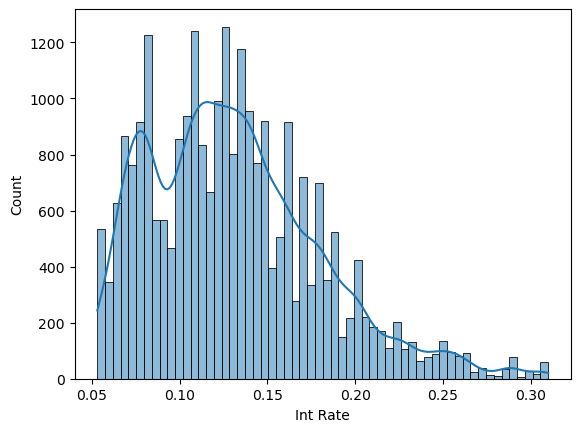

In [161]:
sns.histplot(df['Int Rate'],kde=True)

In [162]:
df['Int Rate']=df['Int Rate'].fillna(df['Int Rate'].median())
get_messing(df)

No Messing Data


- We will impute by the median since the data is skewed and to make maintain the distribution.

- MCAR (Missing Completely At Random)
    - The missingness (Int Rate) is entirely random and unrelated to any data.

In [165]:
log_to_lookup_table(tmp,df,"I","median")

Updated Lookup_table : 


,Original,Imputed/Encoded
Column,,
Annual Inc Joint,NaN,165000.0 (From Annual Inc)
Annual Inc Joint,NaN,51000.0 (From Annual Inc)
Annual Inc Joint,NaN,100000.0 (From Annual Inc)
Annual Inc Joint,NaN,95000.0 (From Annual Inc)
Annual Inc Joint,NaN,55120.0 (From Annual Inc)
...,...,...
Annual Inc Joint,NaN,42288.0 (From Annual Inc)
Annual Inc Joint,NaN,207000.0 (From Annual Inc)
Annual Inc Joint,NaN,107450.0 (From Annual Inc)


## Outliers

In [167]:
def handel_Outliers(df,Outlier_columns):
    for col in Outlier_columns:
        print(col," : \n")
        # first get the IQR value then apply the rule
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f"IQR = {IQR}")
        # Anything above the upper limit or lower than the lower limit is an outlier
        cut_off = IQR * 1.5
        lower = Q1 - cut_off
        upper =  Q3 + cut_off
        print(f"lower,upper bounds [{lower},{upper}]")
        
        u = df[df[col]> upper]
        l = df[df[col] < lower]
        print(F'Total number of outliers in {col} are {u.shape[0]+ l.shape[0]}')
        
        df.loc[df[col] < lower, col] = df[col].median()
        df.loc[df[col] > upper, col] = df[col].median()

        print("===========================================")
    return df

In [168]:
numeric_df=df.select_dtypes(include=['float64', 'int64'])
Outliers=numeric_df.drop('Grade', axis=1).columns.tolist()
Outliers

['Annual Inc',
 'Individual/Joint Annual Inc',
 'Avg Cur Bal',
 'Tot Cur Bal',
 'Loan Amount',
 'Int Rate']

In [169]:
df_old=df.copy()
df=handel_Outliers(df.copy(),Outliers)

Annual Inc  : 

IQR = 47253.75
lower,upper bounds [-23134.375,165880.625]
Total number of outliers in Annual Inc are 1418
Individual/Joint Annual Inc  : 

IQR = 50000.0
lower,upper bounds [-25000.0,175000.0]
Total number of outliers in Individual/Joint Annual Inc are 1469
Avg Cur Bal  : 

IQR = 15854.75
lower,upper bounds [-20663.125,42755.875]
Total number of outliers in Avg Cur Bal are 1442
Tot Cur Bal  : 

IQR = 189270.75
lower,upper bounds [-254538.625,502544.375]
Total number of outliers in Tot Cur Bal are 925
Loan Amount  : 

IQR = 12168.75
lower,upper bounds [-10253.125,38421.875]
Total number of outliers in Loan Amount are 609
Int Rate  : 

IQR = 0.06280000000000001
lower,upper bounds [0.0006999999999999923,0.2519]
Total number of outliers in Int Rate are 586


- Outliers were handeld by imputing the median across the column so as not to change the distribution.
- The IQR method was used since it's more general and also the distributions are not Normal.

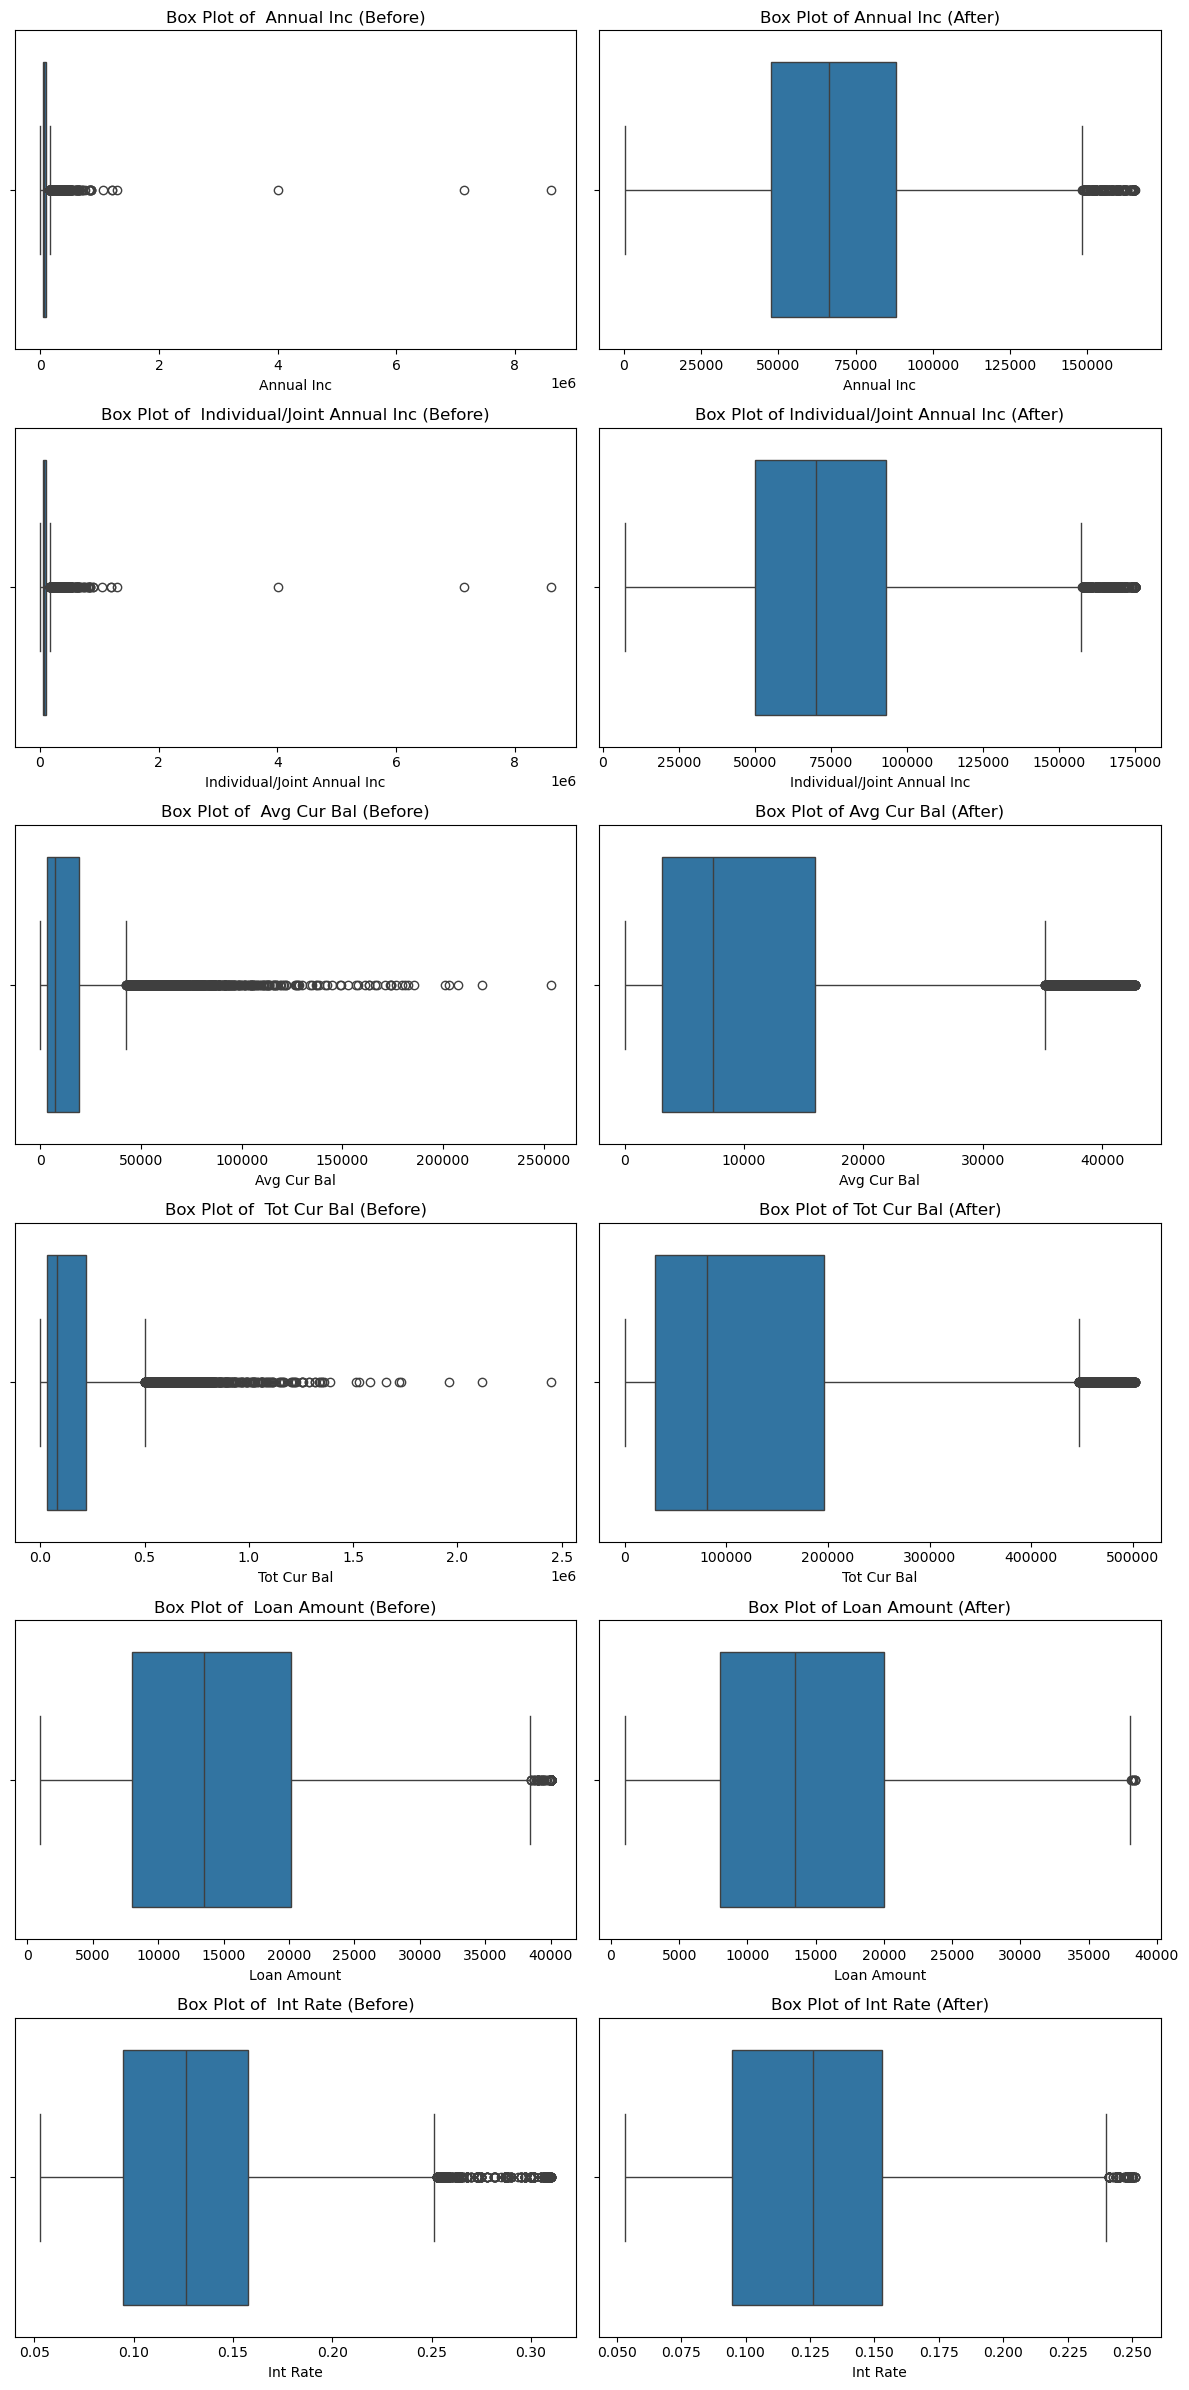

In [171]:
num_columns = len(Outliers)  # Number of columns in your DataFrame
fig, axes = plt.subplots(num_columns, 2, figsize=(12, num_columns * 4))  # 2 subplots (distribution and boxplot) for each column

# Loop through each column to create distribution and boxplot
for i, column in enumerate(Outliers):
    # Before
    sns.boxplot(x=df_old[column], ax=axes[i, 0])  # kde=True adds a kernel density estimate (smoothed curve)
    axes[i, 0].set_title(f'Box Plot of  {column} (Before)')

    # After
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {column} (After)')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

- These plots show the diffrence between the Box Plots Before and After Handeling the Outliers.

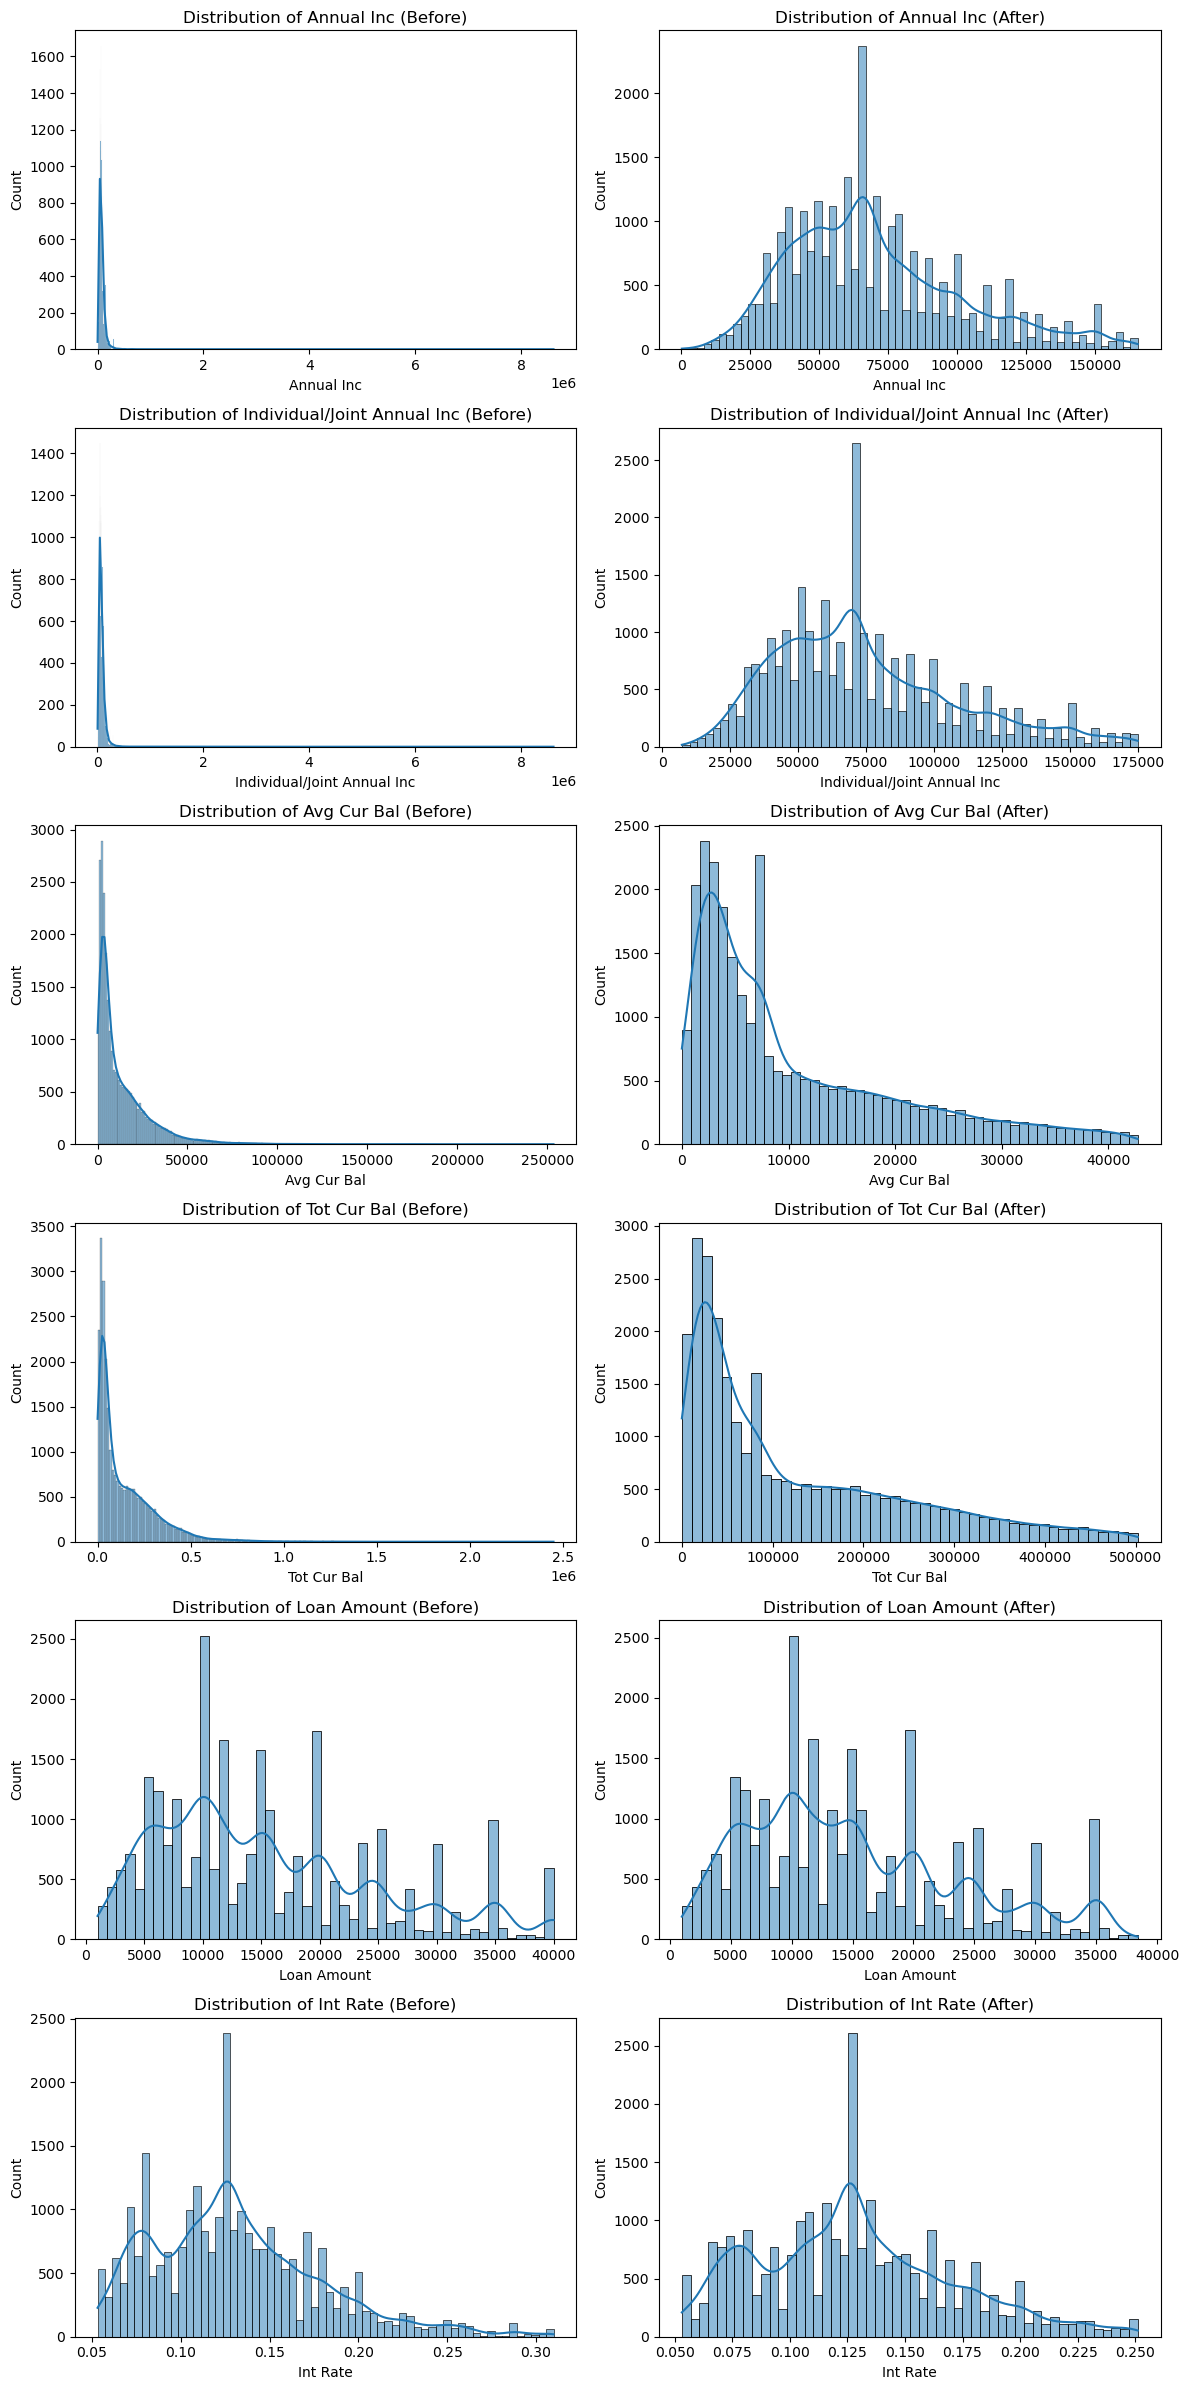

In [173]:
num_columns = len(Outliers)  # Number of columns in your DataFrame
fig, axes = plt.subplots(num_columns, 2, figsize=(12, num_columns * 4))  # 2 subplots (distribution and boxplot) for each column

# Loop through each column to create distribution and boxplot
for i, column in enumerate(Outliers):
    # Distribution Plot
    sns.histplot(x=df_old[column], ax=axes[i, 0], kde=True)  # kde=True adds a kernel density estimate (smoothed curve)
    axes[i, 0].set_title(f'Distribution of {column} (Before)')

    # After
    sns.histplot(x=df[column], ax=axes[i, 1],kde=True)
    axes[i, 1].set_title(f'Distribution of {column} (After)')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


- These plots show the diffrence between the Distribution Plots Before and After Handeling the Outliers.
- Handeling the Outliers this way helped in keeping the distributions as is.

# Data Transformation & Feature Engineering


## Feature Engineering

Add the following 4 columns
1. Month number: integer - create a month number column (1-12) to be able to discretize the data
by month number.-- Tip: Change the datatype of the date feature to datetime type instead of an object.
2. Salary Can Cover: boolean - this column should contain a boolean value (true = 1 & false = 0)
that shows if the annual income can cover the loan amount or not.
3. Letter Grade: categorical - encode the grade column using the categories in the dataset description (A-G).
4. Installment per month: float - use the below formula to calculate the monthly installments:


$$
M = P \times \frac{r \times (1 + r)^n}{(1 + r)^n - 1}
$$


Where:
- M is the monthly installment.
- P is the loan principle/amount.
- r is the monthly interest rat , r = int rate/12
- n is the number of payments/monthss

In [178]:
df.head(2)

,Emp Title,Emp Length,Home Ownership,Annual Inc,Individual/Joint Annual Inc,Verification Status,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose
Loan Id,,,,,,,,,,,,,,,,,,
188460,Director of pharmacy,10+ years,MORTGAGE,165000.0,165000.0,Source Verified,2464.0,39425.0,Current,20000.0,SC,36 months,0.0646,1,18 December 2018,False,individual,debt_consolidation
126546,Manager,10+ years,RENT,51000.0,51000.0,Source Verified,12685.0,88792.0,Current,12000.0,GA,60 months,0.1465,11,15 September 2015,False,individual,debt_consolidation


### Month number

In [180]:
df['Issue Date']=pd.to_datetime(df['Issue Date'])
col_position = df.columns.get_loc('Issue Date')
df.insert(col_position + 1, 'Issue Day', df['Issue Date'].dt.day)
df.insert(col_position + 2, 'Issue Month', df['Issue Date'].dt.month)
df.insert(col_position + 3, 'Issue Year', df['Issue Date'].dt.year)
df.drop(columns=['Issue Date'],inplace=True)
df.head(2)

,Emp Title,Emp Length,Home Ownership,Annual Inc,Individual/Joint Annual Inc,Verification Status,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Term,Int Rate,Grade,Issue Day,Issue Month,Issue Year,Pymnt Plan,Type,Purpose
Loan Id,,,,,,,,,,,,,,,,,,,,
188460,Director of pharmacy,10+ years,MORTGAGE,165000.0,165000.0,Source Verified,2464.0,39425.0,Current,20000.0,SC,36 months,0.0646,1,18,12,2018,False,individual,debt_consolidation
126546,Manager,10+ years,RENT,51000.0,51000.0,Source Verified,12685.0,88792.0,Current,12000.0,GA,60 months,0.1465,11,15,9,2015,False,individual,debt_consolidation


### Letter Grade

In [182]:
bins = [0, 5, 10, 15, 20, 25, 30, 35]  # Bin edges
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']  # Corresponding letter grades
df['Letter Grade'] = pd.cut(df['Grade'], bins=bins, labels=labels, right=True)
df.head(2)

,Emp Title,Emp Length,Home Ownership,Annual Inc,Individual/Joint Annual Inc,Verification Status,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Term,Int Rate,Grade,Issue Day,Issue Month,Issue Year,Pymnt Plan,Type,Purpose,Letter Grade
Loan Id,,,,,,,,,,,,,,,,,,,,,
188460,Director of pharmacy,10+ years,MORTGAGE,165000.0,165000.0,Source Verified,2464.0,39425.0,Current,20000.0,SC,36 months,0.0646,1,18,12,2018,False,individual,debt_consolidation,A
126546,Manager,10+ years,RENT,51000.0,51000.0,Source Verified,12685.0,88792.0,Current,12000.0,GA,60 months,0.1465,11,15,9,2015,False,individual,debt_consolidation,C


### Installment per month

In [184]:
tmpdf = pd.DataFrame()
tmpdf['r'] = df['Int Rate'] / 12 

# Extract the number of months from 'Term'
tmpdf['n'] = df['Term'].str.extract(r'(\d+)').astype(int)

# Calculate the monthly payment using the provided formula
df['Monthly Installment'] = df['Loan Amount'] * (tmpdf['r'] * (1 + tmpdf['r']) ** tmpdf['n']) / ((1 + tmpdf['r']) ** tmpdf['n'] - 1)
df.head(2)

,Emp Title,Emp Length,Home Ownership,Annual Inc,Individual/Joint Annual Inc,Verification Status,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Term,Int Rate,Grade,Issue Day,Issue Month,Issue Year,Pymnt Plan,Type,Purpose,Letter Grade,Monthly Installment
Loan Id,,,,,,,,,,,,,,,,,,,,,,
188460,Director of pharmacy,10+ years,MORTGAGE,165000.0,165000.0,Source Verified,2464.0,39425.0,Current,20000.0,SC,36 months,0.0646,1,18,12,2018,False,individual,debt_consolidation,A,612.615996
126546,Manager,10+ years,RENT,51000.0,51000.0,Source Verified,12685.0,88792.0,Current,12000.0,GA,60 months,0.1465,11,15,9,2015,False,individual,debt_consolidation,C,283.279273


### Salary Can Cover

In [186]:
salary=df['Individual/Joint Annual Inc']/12
df['Salary Can Cover']=df['Annual Inc'] >= df['Monthly Installment']
df['Salary Can Cover'].value_counts()

Salary Can Cover
True     27028
False        2
Name: count, dtype: int64

In [187]:
df.head(2)

,Emp Title,Emp Length,Home Ownership,Annual Inc,Individual/Joint Annual Inc,Verification Status,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Term,Int Rate,Grade,Issue Day,Issue Month,Issue Year,Pymnt Plan,Type,Purpose,Letter Grade,Monthly Installment,Salary Can Cover
Loan Id,,,,,,,,,,,,,,,,,,,,,,,
188460,Director of pharmacy,10+ years,MORTGAGE,165000.0,165000.0,Source Verified,2464.0,39425.0,Current,20000.0,SC,36 months,0.0646,1,18,12,2018,False,individual,debt_consolidation,A,612.615996,True
126546,Manager,10+ years,RENT,51000.0,51000.0,Source Verified,12685.0,88792.0,Current,12000.0,GA,60 months,0.1465,11,15,9,2015,False,individual,debt_consolidation,C,283.279273,True


## Encoding

In [189]:
df.head(2)

,Emp Title,Emp Length,Home Ownership,Annual Inc,Individual/Joint Annual Inc,Verification Status,Avg Cur Bal,Tot Cur Bal,Loan Status,Loan Amount,State,Term,Int Rate,Grade,Issue Day,Issue Month,Issue Year,Pymnt Plan,Type,Purpose,Letter Grade,Monthly Installment,Salary Can Cover
Loan Id,,,,,,,,,,,,,,,,,,,,,,,
188460,Director of pharmacy,10+ years,MORTGAGE,165000.0,165000.0,Source Verified,2464.0,39425.0,Current,20000.0,SC,36 months,0.0646,1,18,12,2018,False,individual,debt_consolidation,A,612.615996,True
126546,Manager,10+ years,RENT,51000.0,51000.0,Source Verified,12685.0,88792.0,Current,12000.0,GA,60 months,0.1465,11,15,9,2015,False,individual,debt_consolidation,C,283.279273,True


In [190]:
df.describe(include=[object, 'category'])

,Emp Title,Emp Length,Home Ownership,Verification Status,Loan Status,State,Term,Type,Purpose,Letter Grade
count,27030,27030,27030,27030,27030,27030,27030,27030,27030,27030
unique,13212,12,4,3,7,50,2,3,13,7
top,Not Specified,10+ years,MORTGAGE,Source Verified,Current,CA,36 months,individual,debt_consolidation,B
freq,2438,8902,13302,10463,16937,3638,18953,25081,15197,7884


- **Label Encoding** ( can be used here because these columns have a meaningful order. This way, the model can learn from the ordinal relationship between values.)
    - Emp Length (ordinal)
    - Term (ordinal) we will only extract the no to represent the column itself
    - Letter Grade (ordinal)
    - State (mid cardinality, nominal but will introduce 50 columns so one hot is not a good option here)

- **One-Hot Encoding** ( can be used since it's a nominal variable with a small number of categories.)
    - Home Ownership (nominal)
    - Verification Status (nominal)
    - Loan Status (nominal)
    - Type (nominal)
    - Purpose (nominal but will introduce 13 columns so we will use one-hot encoding but with frequent values)
    




- In the case of **Emp Title** (high cardinality, non-ordinal) it will be dropped (in Final cleaning section) since it has high cardinality so frequency encoding will not work here too.
- It also does not add much to the data.

In [193]:
df['Emp Title'].value_counts()/df.shape[0]*100

Emp Title
Not Specified           9.019608
Teacher                 1.727710
Manager                 1.413245
Registered Nurse        0.765816
Owner                   0.751017
                          ...   
McLane Company          0.003700
used car manger         0.003700
Westside Care Center    0.003700
AUDITOR                 0.003700
Picker                  0.003700
Name: count, Length: 13212, dtype: float64

In [194]:
purpose_counts=df['Purpose'].value_counts()/df.shape[0]*100
purpose_counts

Purpose
debt_consolidation    56.222716
credit_card           23.747688
home_improvement       6.688864
other                  5.971143
major_purchase         2.119867
medical                1.231964
small_business         0.987791
car                    0.917499
house                  0.743618
vacation               0.680725
moving                 0.584536
renewable_energy       0.073992
wedding                0.029597
Name: count, dtype: float64

In [195]:
#Label encoding for ordinal columns
label_encoder = LabelEncoder()
df_encoded=df.copy()
df_encoded['Emp Length'] = label_encoder.fit_transform(df_encoded['Emp Length'])
df_encoded['Letter Grade'] = label_encoder.fit_transform(df_encoded['Letter Grade'])

#Special case for column Term
df_encoded['Term'] = df['Term'].str.extract(r'(\d+)').astype(int)

# One-Hot Label encoding for nominal columns
categories_below_1_percent = purpose_counts[purpose_counts < 1].index

# Step 3: Replace entries in the 'Purpose' column that are below 1% with 'Other'
df_encoded['Purpose'] = df['Purpose'].replace(categories_below_1_percent, 'other')
df_encoded['Purpose'].value_counts()/df.shape[0]*100
log_to_lookup_table(df[['Emp Length','Letter Grade','Term','Purpose']],df_encoded[['Emp Length','Letter Grade','Term','Purpose']],"E","")
df_encoded=pd.get_dummies(df_encoded, columns=['Home Ownership','Verification Status','Loan Status','Type','Purpose'], drop_first=False)
df_encoded = df_encoded.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

print(f"No columns changed from {df.shape[1]} ---> {df_encoded.shape[1]}")
df_encoded.head(2)

Updated Lookup_table : 


,Original,Imputed/Encoded
Column,,
Annual Inc Joint,NaN,165000.0 (From Annual Inc)
Annual Inc Joint,NaN,51000.0 (From Annual Inc)
Annual Inc Joint,NaN,100000.0 (From Annual Inc)
Annual Inc Joint,NaN,95000.0 (From Annual Inc)
Annual Inc Joint,NaN,55120.0 (From Annual Inc)
...,...,...
Purpose,car,other
Purpose,vacation,other
Purpose,house,other


No columns changed from 23 ---> 41


,Emp Title,Emp Length,Annual Inc,Individual/Joint Annual Inc,Avg Cur Bal,Tot Cur Bal,Loan Amount,State,Term,Int Rate,Grade,Issue Day,Issue Month,Issue Year,Pymnt Plan,Letter Grade,Monthly Installment,Salary Can Cover,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Loan Status_Charged Off,Loan Status_Current,Loan Status_Default,Loan Status_Fully Paid,Loan Status_In Grace Period,Loan Status_Late (16-30 days),Loan Status_Late (31-120 days),Type_direct_pay,Type_individual,Type_joint,Purpose_credit_card,Purpose_debt_consolidation,Purpose_home_improvement,Purpose_major_purchase,Purpose_medical,Purpose_other
Loan Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
188460,Director of pharmacy,1,165000.0,165000.0,2464.0,39425.0,20000.0,SC,36,0.0646,1,18,12,2018,0,0,612.615996,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
126546,Manager,1,51000.0,51000.0,12685.0,88792.0,12000.0,GA,60,0.1465,11,15,9,2015,0,2,283.279273,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [196]:
(df.State.value_counts()/df.shape[0]*100).round(2)

State
CA    13.46
NY     8.40
TX     8.26
FL     7.22
IL     4.13
PA     3.53
NJ     3.53
OH     3.41
GA     3.36
NC     2.90
VA     2.70
MI     2.50
AZ     2.42
MD     2.35
MA     2.31
CO     2.13
WA     2.09
IN     1.81
MN     1.71
MO     1.65
CT     1.64
TN     1.56
NV     1.44
WI     1.30
SC     1.23
AL     1.22
LA     1.17
OR     1.11
KY     0.90
KS     0.79
OK     0.79
AR     0.74
UT     0.70
NM     0.55
MS     0.52
NH     0.49
WV     0.46
HI     0.45
NE     0.34
RI     0.32
AK     0.29
MT     0.28
DE     0.27
ME     0.27
SD     0.26
ID     0.24
VT     0.22
WY     0.22
DC     0.21
ND     0.15
Name: count, dtype: float64

In [197]:
# Label Encoding for state
df_encoded['State'] = label_encoder.fit_transform(df['State'])
log_to_lookup_table(df[['State']],df_encoded[['State']],"E","")


Updated Lookup_table : 


,Original,Imputed/Encoded
Column,,
Annual Inc Joint,NaN,165000.0 (From Annual Inc)
Annual Inc Joint,NaN,51000.0 (From Annual Inc)
Annual Inc Joint,NaN,100000.0 (From Annual Inc)
Annual Inc Joint,NaN,95000.0 (From Annual Inc)
Annual Inc Joint,NaN,55120.0 (From Annual Inc)
...,...,...
State,ME,20
State,MT,25
State,RI,38


In [198]:
df_encoded.head(2)

,Emp Title,Emp Length,Annual Inc,Individual/Joint Annual Inc,Avg Cur Bal,Tot Cur Bal,Loan Amount,State,Term,Int Rate,Grade,Issue Day,Issue Month,Issue Year,Pymnt Plan,Letter Grade,Monthly Installment,Salary Can Cover,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Loan Status_Charged Off,Loan Status_Current,Loan Status_Default,Loan Status_Fully Paid,Loan Status_In Grace Period,Loan Status_Late (16-30 days),Loan Status_Late (31-120 days),Type_direct_pay,Type_individual,Type_joint,Purpose_credit_card,Purpose_debt_consolidation,Purpose_home_improvement,Purpose_major_purchase,Purpose_medical,Purpose_other
Loan Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
188460,Director of pharmacy,1,165000.0,165000.0,2464.0,39425.0,20000.0,39,36,0.0646,1,18,12,2018,0,0,612.615996,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
126546,Manager,1,51000.0,51000.0,12685.0,88792.0,12000.0,10,60,0.1465,11,15,9,2015,0,2,283.279273,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


## Scaling

In [200]:
df_encoded.describe()

,Emp Length,Annual Inc,Individual/Joint Annual Inc,Avg Cur Bal,Tot Cur Bal,Loan Amount,State,Term,Int Rate,Grade,Issue Day,Issue Month,Issue Year,Pymnt Plan,Letter Grade,Monthly Installment,Salary Can Cover,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Loan Status_Charged Off,Loan Status_Current,Loan Status_Default,Loan Status_Fully Paid,Loan Status_In Grace Period,Loan Status_Late (16-30 days),Loan Status_Late (31-120 days),Type_direct_pay,Type_individual,Type_joint,Purpose_credit_card,Purpose_debt_consolidation,Purpose_home_improvement,Purpose_major_purchase,Purpose_medical,Purpose_other
count,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.00000,27030.000000
mean,4.112320,70163.249330,74170.108223,10711.928857,124835.335313,14836.687939,22.523492,43.171587,0.127626,10.949945,16.578172,6.715353,2016.578172,0.000037,1.590307,435.425775,0.999926,0.492120,0.001221,0.116278,0.390381,0.362449,0.387088,0.250462,0.069626,0.626600,0.000111,0.282131,0.006030,0.003108,0.012394,0.001295,0.927895,0.070810,0.237477,0.562227,0.066889,0.021199,0.01232,0.099889
std,3.638381,31380.654728,33563.662972,9992.769917,120827.182228,8638.322366,14.657783,10.985941,0.042654,6.325086,1.852614,3.404984,1.852614,0.006082,1.233258,250.632241,0.008602,0.499947,0.034920,0.320564,0.487845,0.480716,0.487093,0.433287,0.254521,0.483716,0.010535,0.450045,0.077422,0.055661,0.110637,0.035961,0.258667,0.256512,0.425545,0.496122,0.249834,0.144049,0.11031,0.299858
min,0.000000,200.000000,7200.000000,0.000000,0.000000,1000.000000,0.000000,36.000000,0.053100,1.000000,12.000000,1.000000,2012.000000,0.000000,0.000000,30.644451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,47746.250000,50000.000000,3119.000000,29367.500000,8000.000000,9.000000,36.000000,0.094900,6.000000,15.000000,4.000000,2015.000000,0.000000,1.000000,256.793889,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.000000,66500.000000,70000.000000,7358.250000,80650.250000,13500.000000,22.000000,36.000000,0.126200,10.000000,17.000000,7.000000,2017.000000,0.000000,1.000000,375.151281,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,7.000000,88000.000000,93000.000000,15957.500000,196308.500000,20000.000000,34.000000,60.000000,0.153100,15.000000,18.000000,10.000000,2018.000000,0.000000,2.000000,568.570904,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,11.000000,165500.000000,175000.000000,42747.000000,502246.000000,38400.000000,49.000000,60.000000,0.251100,35.000000,19.000000,12.000000,2019.000000,1.000000,6.000000,1440.447352,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


- Features that need scaling are [Annual Inc , Avg Cur Bal , Tot Cur Bal , Loan Amount , Monthly Installment] since they are numbers ranging from 10 thousands to hundred thousands.

In [202]:
columns_to_scale =  ['Annual Inc' , 'Avg Cur Bal' , 'Tot Cur Bal' , 'Loan Amount' , 'Monthly Installment']
df_scaled=df_encoded.copy()
df_scaled[columns_to_scale] = StandardScaler().fit_transform(df_scaled[columns_to_scale])
df_scaled.describe()

,Emp Length,Annual Inc,Individual/Joint Annual Inc,Avg Cur Bal,Tot Cur Bal,Loan Amount,State,Term,Int Rate,Grade,Issue Day,Issue Month,Issue Year,Pymnt Plan,Letter Grade,Monthly Installment,Salary Can Cover,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Loan Status_Charged Off,Loan Status_Current,Loan Status_Default,Loan Status_Fully Paid,Loan Status_In Grace Period,Loan Status_Late (16-30 days),Loan Status_Late (31-120 days),Type_direct_pay,Type_individual,Type_joint,Purpose_credit_card,Purpose_debt_consolidation,Purpose_home_improvement,Purpose_major_purchase,Purpose_medical,Purpose_other
count,27030.000000,2.703000e+04,27030.000000,2.703000e+04,2.703000e+04,2.703000e+04,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.000000,27030.00000,27030.000000
mean,4.112320,2.917878e-17,74170.108223,5.020853e-17,-1.642949e-17,6.046054e-17,22.523492,43.171587,0.127626,10.949945,16.578172,6.715353,2016.578172,0.000037,1.590307,7.833583e-17,0.999926,0.492120,0.001221,0.116278,0.390381,0.362449,0.387088,0.250462,0.069626,0.626600,0.000111,0.282131,0.006030,0.003108,0.012394,0.001295,0.927895,0.070810,0.237477,0.562227,0.066889,0.021199,0.01232,0.099889
std,3.638381,1.000018e+00,33563.662972,1.000018e+00,1.000018e+00,1.000018e+00,14.657783,10.985941,0.042654,6.325086,1.852614,3.404984,1.852614,0.006082,1.233258,1.000018e+00,0.008602,0.499947,0.034920,0.320564,0.487845,0.480716,0.487093,0.433287,0.254521,0.483716,0.010535,0.450045,0.077422,0.055661,0.110637,0.035961,0.258667,0.256512,0.425545,0.496122,0.249834,0.144049,0.11031,0.299858
min,0.000000,-2.229544e+00,7200.000000,-1.071988e+00,-1.033192e+00,-1.601809e+00,0.000000,36.000000,0.053100,1.000000,12.000000,1.000000,2012.000000,0.000000,0.000000,-1.615071e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,-7.143705e-01,50000.000000,-7.598563e-01,-7.901335e-01,-7.914516e-01,9.000000,36.000000,0.094900,6.000000,15.000000,4.000000,2015.000000,0.000000,1.000000,-7.127383e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.000000,-1.167381e-01,70000.000000,-3.356167e-01,-3.656951e-01,-1.547422e-01,22.000000,36.000000,0.126200,10.000000,17.000000,7.000000,2017.000000,0.000000,1.000000,-2.404942e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,7.000000,5.684101e-01,93000.000000,5.249464e-01,5.915431e-01,5.977327e-01,34.000000,60.000000,0.153100,15.000000,18.000000,10.000000,2018.000000,0.000000,2.000000,5.312469e-01,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,11.000000,3.038130e+00,175000.000000,3.205884e+00,3.123615e+00,2.727815e+00,49.000000,60.000000,0.251100,35.000000,19.000000,12.000000,2019.000000,1.000000,6.000000,4.010019e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

- Standardization is used here to scale down the features and reduce the skewness of the data.
- This technique centers the data around the mean and scales it based on the standard deviation.

In [204]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27030 entries, 188460 to 202331
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Emp Title                            27030 non-null  object 
 1   Emp Length                           27030 non-null  int32  
 2   Annual Inc                           27030 non-null  float64
 3   Individual/Joint Annual Inc          27030 non-null  float64
 4   Avg Cur Bal                          27030 non-null  float64
 5   Tot Cur Bal                          27030 non-null  float64
 6   Loan Amount                          27030 non-null  float64
 7   State                                27030 non-null  int32  
 8   Term                                 27030 non-null  int32  
 9   Int Rate                             27030 non-null  float64
 10  Grade                                27030 non-null  int64  
 11  Issue Day                  

## Final cleaning

In [206]:
df_final=df_scaled.drop(['Grade','Emp Title'],axis=1)
print(f"Final shape {df_final.shape}")
df_final.head(2)

Final shape (27030, 39)


,Emp Length,Annual Inc,Individual/Joint Annual Inc,Avg Cur Bal,Tot Cur Bal,Loan Amount,State,Term,Int Rate,Issue Day,Issue Month,Issue Year,Pymnt Plan,Letter Grade,Monthly Installment,Salary Can Cover,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Loan Status_Charged Off,Loan Status_Current,Loan Status_Default,Loan Status_Fully Paid,Loan Status_In Grace Period,Loan Status_Late (16-30 days),Loan Status_Late (31-120 days),Type_direct_pay,Type_individual,Type_joint,Purpose_credit_card,Purpose_debt_consolidation,Purpose_home_improvement,Purpose_major_purchase,Purpose_medical,Purpose_other
Loan Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
188460,1,3.022197,165000.0,-0.825405,-0.706893,0.597733,39,36,0.0646,18,12,2018,0,0,0.706986,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
126546,1,-0.610682,51000.0,0.197454,-0.298310,-0.328390,10,60,0.1465,15,9,2015,0,2,-0.607062,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


- Those 2 columns were dropped since there is no use of them.
    - Emp Title has high cardinality(almost every entry is unique) so it cant be encoded.
    - Grade column is already transformed to Letter Grade colummn so we dont need the old one.

# Final Lookup_Table

In [209]:
display(lookup_table)

,Original,Imputed/Encoded
Column,,
Annual Inc Joint,NaN,165000.0 (From Annual Inc)
Annual Inc Joint,NaN,51000.0 (From Annual Inc)
Annual Inc Joint,NaN,100000.0 (From Annual Inc)
Annual Inc Joint,NaN,95000.0 (From Annual Inc)
Annual Inc Joint,NaN,55120.0 (From Annual Inc)
...,...,...
State,ME,20
State,MT,25
State,RI,38


# Saving

In [211]:
df_final.to_csv("E:/GUC/Sem 9/(NETW908) Data Engineering/fintech_data_NETW_P2_52_23411_clean.csv")
lookup_table.to_csv("E:\GUC\Sem 9\(NETW908) Data Engineering\Lookup_Table_NETW_P2_52_23411.csv")